# Visualizing Earnings Based on College Majors

In this project, we worked with a [dataset]() on the job outcomes of students who graduated from college between 2010 and 2012. We used the plotting tools built into pandas to explore data on job outcomes. The dataset was extracted from [here](https://github.com/fivethirtyeight/data/tree/master/college-majors), however, the original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

# running jupyter magic to display the plots inline
%matplotlib inline

In [2]:
# reading dataset into dataframe
recent_grads = pd.read_csv('recent-grads.csv')

In [3]:
# looking for header of the dataframe
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
# examining first five rows of dataframe
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
# examining last five rows of dataframe
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
# generating summary stats for numeric columns in the dataframe
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
# number of rows in dataframe having missing values
raw_data_count = len(recent_grads)
raw_data_count

173

In [8]:
# dropping missing values in the dataframe to prevent errors from
# passing columns in the matplotlib
recent_grads = recent_grads.dropna()

# number of rows after droppring missing values
cleaned_data_count = len(recent_grads)
cleaned_data_count

172

Only one row in dataframe containing missing values was dropped.

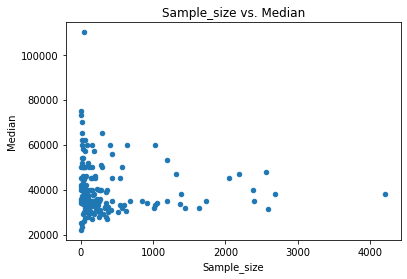

In [9]:
# generating scatter plots for Sample_size and Median
# to explore correlations

recent_grads.plot(x='Sample_size', y='Median', 
                  kind='scatter', title='Sample_size vs. Median')

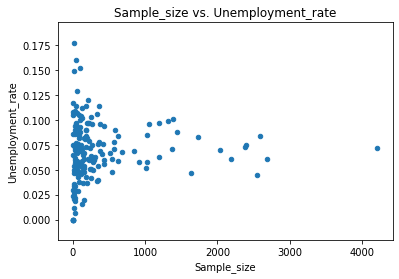

In [10]:
# generating scatter plots for Sample_size and Unemployment_rate
# to explore correlations

recent_grads.plot(x='Sample_size', y='Unemployment_rate', 
                  kind='scatter', title='Sample_size vs. Unemployment_rate')

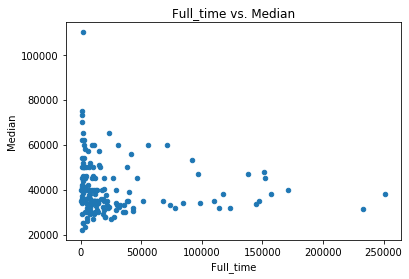

In [11]:
# generating scatter plots for Full_time and Median
# to explore correlations

recent_grads.plot(x='Full_time', y='Median', 
                  kind='scatter', title='Full_time vs. Median')

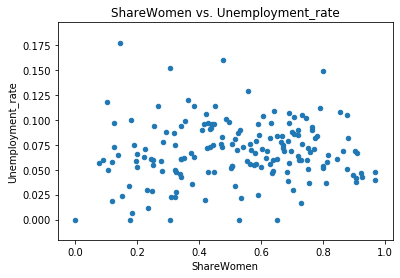

In [12]:
# generating scatter plots for ShareWomen and Unemployment_rate
# to explore correlations

recent_grads.plot(x='ShareWomen', y='Unemployment_rate', 
                  kind='scatter', title='ShareWomen vs. Unemployment_rate')

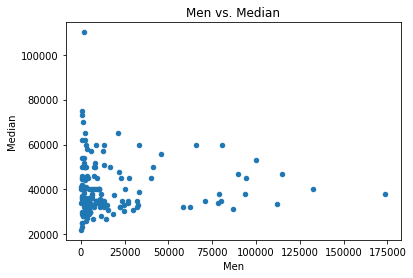

In [13]:
# generating scatter plots for Men and Median
# to explore correlations

recent_grads.plot(x='Men', y='Median', 
                  kind='scatter', title='Men vs. Median')

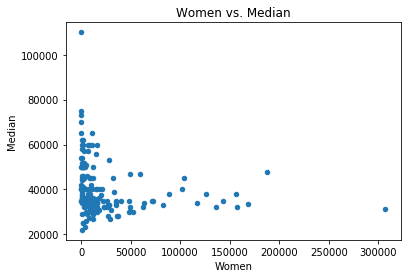

In [14]:
# generating scatter plots for Women and Median
# to explore correlations

recent_grads.plot(x='Women', y='Median', 
                  kind='scatter', title='Women vs. Median')

It may be observed that majority students, men and women, with more popular majors and working full_time are earning within range 20000 to 30000.

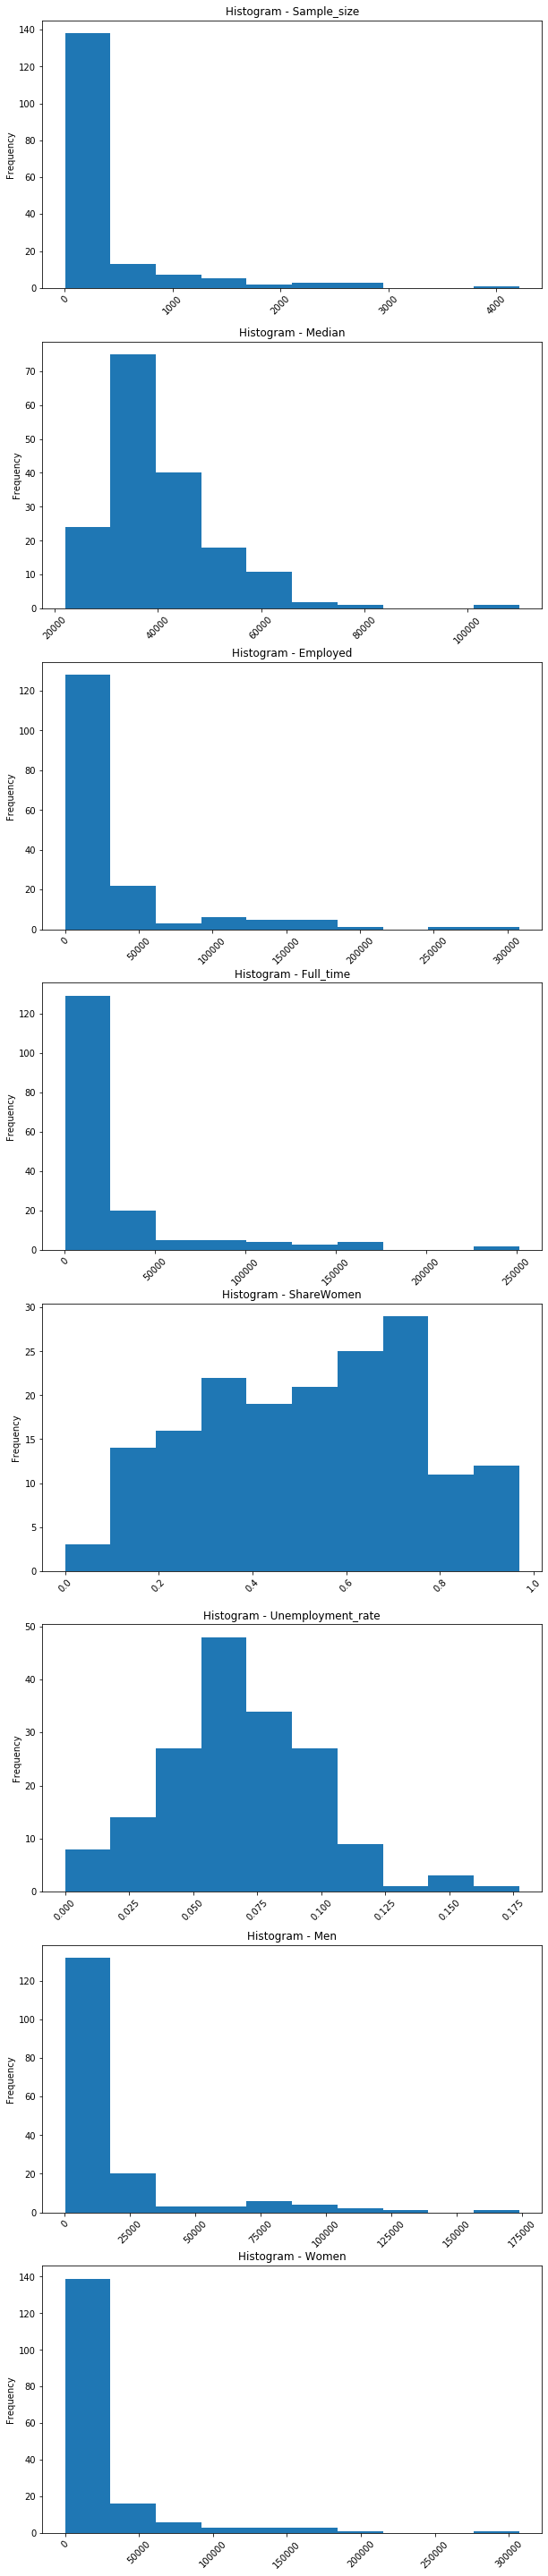

In [15]:
# generating histogram to explore distributions of dataframe columns

columns = ['Sample_size', 'Median', 'Employed', 'Full_time', 
           'ShareWomen', 'Unemployment_rate', 'Men', 'Women']

fig = plt.figure(figsize=(10, 10))
for i in range(0, 8):
    labels = 'Histogram - ' + columns[i]
    ax = fig.add_subplot(8,1,(i+1))
    ax = recent_grads[columns[i]].plot(kind='hist', bins=10, 
                                       title=labels, rot=45)
plt.subplots_adjust(bottom=0.1, top=4)

From above histogram of Median, we may observe that the most common median salary range was 30000 to 40000.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A337240>,
      dtype=object)

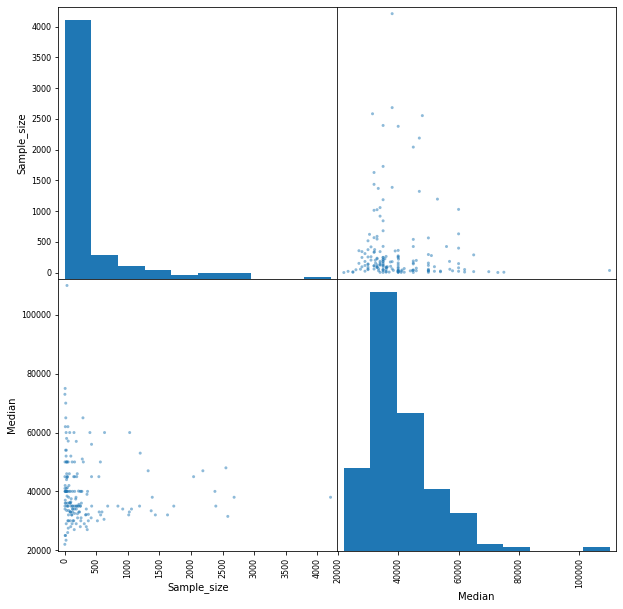

In [16]:
# importing scatter_matrix from pandas.plotting module
from pandas.plotting import scatter_matrix

# creating a scatter matrix plot
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

We may observe the potential relationships and distributions simultaneously between Sample_size and Median as they are combined into Scatter matrix plot.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008DBD0F0>,
      dtype=object)

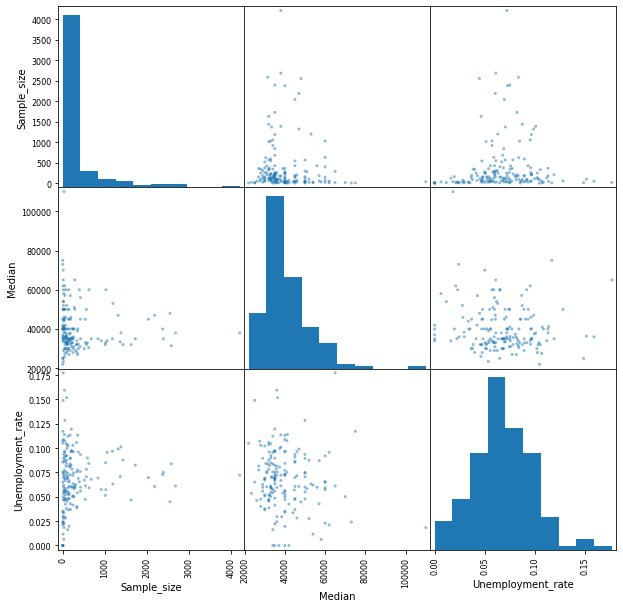

In [17]:
# creating a scatter matrix plot for Sample_size, Median and
# Unemployment_rate columns

scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], 
                          figsize=(10,10))

Text(0, 0.5, 'ShareWomen')

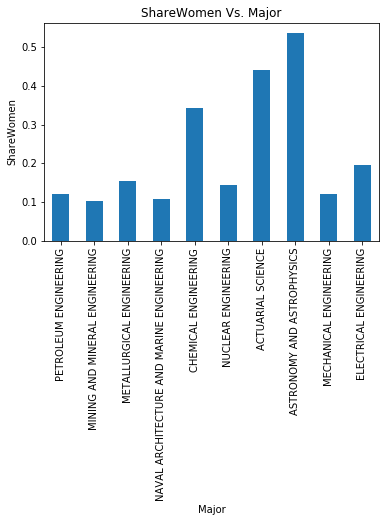

In [18]:
# creating bar plots to compare percentages of Women (ShareWomen)
# with the first ten rows of 'Major' column in the dataframe

ax = recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=None)
plt.title('ShareWomen Vs. Major')
plt.ylabel('ShareWomen')

Above plots depicts that women comprises of 55% have had major in Astronomy and Astrophysics.

Text(0, 0.5, 'ShareWomen')

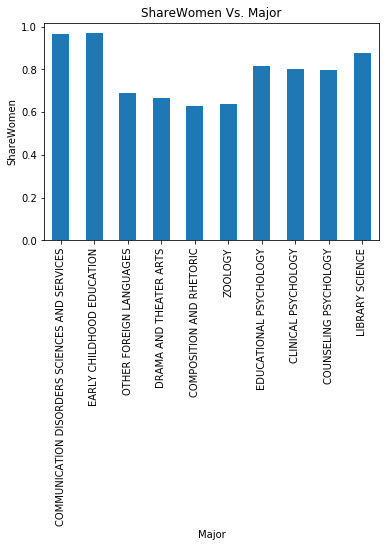

In [19]:
# creating bar plots to compare percentages of Women (ShareWomen)
# with the last ten rows of 'Major' column in the dataframe

ax = recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', legend=None)
plt.title('ShareWomen Vs. Major')
plt.ylabel('ShareWomen')

Above plots depicts that about 96% of women had majors in Communication Disorders Sciences & Services and Early Childhood Education.

Text(0, 0.5, 'Unemployment_rate')

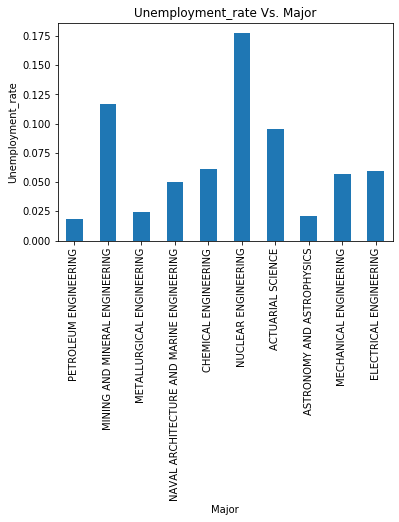

In [20]:
# creating bar plots to compare Unemployment_rate
# with the first ten rows of 'Major' column in the dataframe

ax = recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=None)
plt.title('Unemployment_rate Vs. Major')
plt.ylabel('Unemployment_rate')

Text(0, 0.5, 'Unemployment_rate')

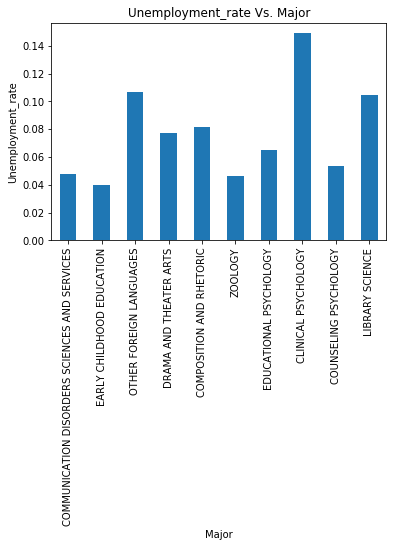

In [21]:
# creating bar plots to compare Unemployment_rate
# with the last ten rows of 'Major' column in the dataframe

ax = recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', legend=None)
plt.title('Unemployment_rate Vs. Major')
plt.ylabel('Unemployment_rate')

In both plots above, it is observed that Majors related to Nuclear Engineering and Clinical Psychology fall at unemployment rates of above 15%.